拟合数据


    x = np.arange(1, 31, 1)
    y = np.array([20, 23, 26, 29, 32, 35, 38, 45, 53, 62, 73, 86, 101, 118, 138, 161, 188, 220, 257, 300, 350, 409, 478, 558, 651, 760, 887, 1035, 1208, 1410])

一、多项式拟合
由泰勒公式知道：任何一个函数都可以拆分成近似于这个函数的多项式表达。
多项式拟合需要用到的函数是np.polyfit，它的使用方法为：

    def polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False):
        """
        Least squares polynomial fit.
        Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
        to points `(x, y)`. Returns a vector of coefficients `p` that minimises
        the squared error.

Pretty printing has been turned ON
        3         2
0.1215 x - 3.045 x + 28.62 x - 34.47
1197.5739550679216
1197.5739550679216


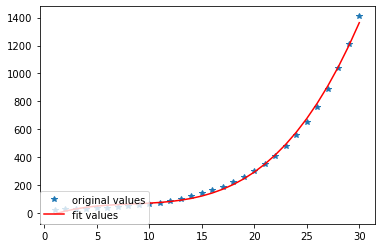

<Figure size 432x288 with 0 Axes>

In [7]:
# 其中需要关注的参数为3个：x、y分别为需要拟合的散点的坐标序列，deg为需要拟合的多项式的最高项数。例如：
import pylab
import numpy as np

if __name__ == "__main__":
  x = np.arange(1, 31, 1)
  y = np.array([20, 23, 26, 29, 32, 35, 38, 45, 53, 62, 73, 86, 101, 118, 138, 161, 188, 220, 257, 300, 350, 409, 478, 558, 651, 760, 887, 1035, 1208, 1410])

  z1 = np.polyfit(x, y, 3)              # 曲线拟合，返回值为多项式的各项系数
  p1 = np.poly1d(z1)                    # 返回值为多项式的表达式，也就是函数式子
  %pprint
  print(p1)
  
  y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
  print(np.polyval(p1, 29))             #根据多项式求解特定 x 对应的 y 值
  print(np.polyval(z1, 29))             #根据多项式求解特定 x 对应的 y 值

  plot1 = pylab.plot(x, y, '*', label='original values')
  plot2 = pylab.plot(x, y_pred, 'r', label='fit values')
  pylab.title('')
  pylab.xlabel('')
  pylab.ylabel('')
  pylab.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
  pylab.show()
  pylab.savefig('p1.png', dpi=200, bbox_inches='tight')
  pylab.show()

二、非多项式拟合

如果需要进行多项式拟合，你必须大体上知道散点的大致曲线形式，大致的函数的形式。
比如，例子中的散点看起来像是指数的函数分布，因此可以给出func的函数：

    def func(x, a, b, c):
        return b * np.power(a, x) + c

只要给出具体的函数形式(可以是任意的，只要能写的出来皆可)，用最小二乘的方式去逼近和拟合，即求出函数的各项系数。
此时用到的是scipy.optimize包下的curve_fit函数了：

[ 1.16791847 13.39168878  1.24633841]


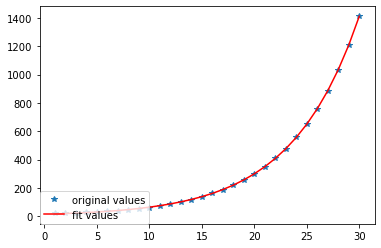

<Figure size 432x288 with 0 Axes>

In [1]:
import pylab
import numpy as np
import sys, os
from scipy.optimize import curve_fit

def func(x, a, b, c):
  return b * np.power(a, x) + c

if __name__ == "__main__":
  x = np.arange(1, 31, 1)
  y = np.array([20, 23, 26, 29, 32, 35, 38, 45, 53, 62, 73, 86, 101, 118, 138, 161, 188, 220, 257, 300, 350, 409, 478, 558, 651, 760, 887, 1035, 1208, 1410])

  popt, pcov = curve_fit(func, x, y)                # 曲线拟合，popt为函数的参数list
  y_pred = [func(i, popt[0], popt[1], popt[2]) for i in x]    # 直接用函数和函数参数list来进行y值的计算
  print(popt)

  plot1 = pylab.plot(x, y, '*', label='original values')
  plot2 = pylab.plot(x, y_pred, 'r', label='fit values')
  pylab.title('')
  pylab.xlabel('')
  pylab.ylabel('')
  pylab.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
  pylab.show()
  pylab.savefig('p1.png', dpi=200, bbox_inches='tight')
